In [2]:
from random import choice
from queue import Queue
import numpy as np
import matplotlib.pyplot as plt
import math
import time

## Генератор данных

In [3]:
def generate_adjacency_matrix(vertice_amount, edge_amount, weight_threshold):
    adj_matrix = np.zeros((vertice_amount, vertice_amount), dtype=int)
    edges_in_matrix = 0

    while edges_in_matrix < edge_amount:
        vertice_1 = choice([i for i in range(vertice_amount) if 0 in adj_matrix[i]])
        vertice_2 = choice([i for i in range(vertice_amount) if i != vertice_1])
        # if (adj_matrix[vertice_1, vertice_2] != 0 or vertice_1 == vertice_2):
        #     continue
        # else:
        weight = choice(range(1, weight_threshold))
        adj_matrix[vertice_1, vertice_2] = weight
        adj_matrix[vertice_2, vertice_1] = weight
        edges_in_matrix = edges_in_matrix + 1

    return adj_matrix

## Алгоритм Левита

In [4]:


def sssp_levit(graph, source = 0):
    weights = [math.inf for vertex in graph]
    weights[source] = 0

    def relax_edge(source, dest):
        weight = weights[source] + graph[source, dest]
        if weight < weights[dest]:
            weights[dest] = weight

    # set использует в качестве основы хэш-таблицу - сложность O(1)
    calculated = set()
    calculating = set()
    to_calculate = set()

    calculating_normally = Queue()
    calculating_urgently = Queue()
    
    # первичный шаг
    calculating_normally.put(source)
    calculating.add(source)

    for vertex in [vertex for vertex in range(len(graph)) if vertex != source]:
        to_calculate.add(vertex)

    while len(calculating) != 0:
        current_vertex = None

        if not calculating_urgently.empty():
            current_vertex = calculating_urgently.get()
            calculating.remove(current_vertex)
        elif not calculating_normally.empty():
            current_vertex = calculating_normally.get()
            calculating.remove(current_vertex)
        
        adjacent_vertices = [vertex for vertex in range(len(graph)) if graph[current_vertex, vertex] != 0]

        for adjacent_vertex in adjacent_vertices:
            if adjacent_vertex in to_calculate:
                relax_edge(current_vertex, adjacent_vertex)
                calculating_normally.put(adjacent_vertex)
                calculating.add(adjacent_vertex)
                to_calculate.remove(adjacent_vertex)
            elif adjacent_vertex in calculating:
                relax_edge(current_vertex, adjacent_vertex)
            elif adjacent_vertex in calculated and weights[adjacent_vertex] > weights[current_vertex] + graph[current_vertex, adjacent_vertex]:
                calculating_urgently.put(adjacent_vertex)
                calculating.add(adjacent_vertex)
                relax_edge(current_vertex, adjacent_vertex)
   
        calculated.add(current_vertex)

    return weights
        





        
            



## Вычислительный эксперимент

90 0.00041174888610839844
380 0.0006585597991943359
870 0.001682615280151367
1560 0.0024332046508789063
2450 0.0033874034881591795
3540 0.005572032928466797
4830 0.009184455871582032
6320 0.009552955627441406
8010 0.02047724723815918
9900 0.023785781860351563


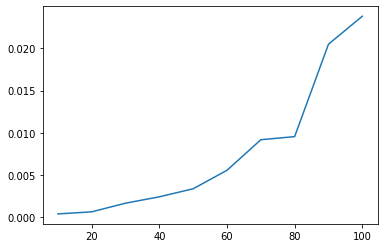

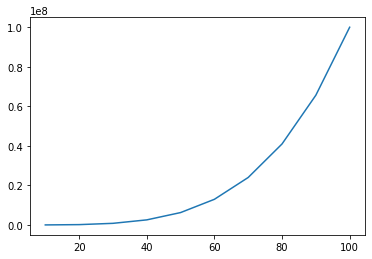

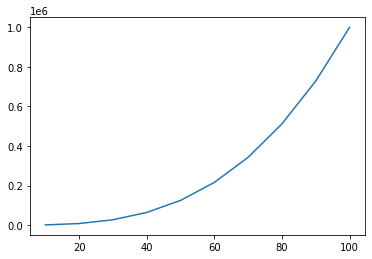

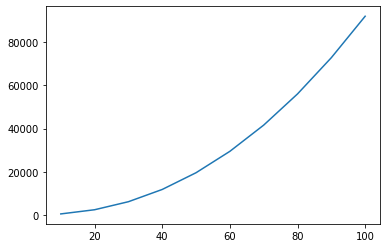

In [9]:
vertice_amounts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
iterations = 5

elapsed_times = []

for vertice_amount in vertice_amounts:
    overall_time = 0
    for _ in range(iterations):
        adj_matrix = generate_adjacency_matrix(vertice_amount, vertice_amount * (vertice_amount - 1), 100)
        start_time = time.time()
        matrix = sssp_levit(adj_matrix, 0)
        overall_time += time.time() - start_time
    average_time = overall_time / iterations
    print(vertice_amount * (vertice_amount - 1), average_time)
    elapsed_times.append(average_time)

fig_experiment, ax_experiment = plt.subplots()
fig_4, ax_4 = plt.subplots()
fig_3, ax_3 = plt.subplots()
fig_log, ax_log = plt.subplots()

ax_experiment.plot(vertice_amounts, elapsed_times)
ax_4.plot(vertice_amounts, [vertice_amount**4 for vertice_amount in vertice_amounts])
ax_3.plot(vertice_amounts, [vertice_amount**3 for vertice_amount in vertice_amounts])
ax_log.plot(vertice_amounts, [(vertice_amount)**2 * math.log((vertice_amount**2)) for vertice_amount in vertice_amounts])


380 0.0012671470642089844
1560 0.003603219985961914
3540 0.006641483306884766
6320 0.021022272109985352
9900 0.02780570983886719
14280 0.0387843132019043
19460 0.05483856201171875
25440 0.0739532470703125
32220 0.06978974342346192
39800 0.09370465278625488
0.00041174888610839844 0.0012671470642089844 3.077475390851187
0.0006585597991943359 0.003603219985961914 5.471363405980741
0.001682615280151367 0.006641483306884766 3.9471193357327063
0.0024332046508789063 0.021022272109985352 8.639746805675315
0.0033874034881591795 0.02780570983886719 8.208561494390405
0.005572032928466797 0.0387843132019043 6.960531945846955
0.009184455871582032 0.05483856201171875 5.970801403858534
0.009552955627441406 0.0739532470703125 7.741399620644904
0.02047724723815918 0.06978974342346192 3.4081604139353905
0.023785781860351563 0.09370465278625488 3.939523759883245


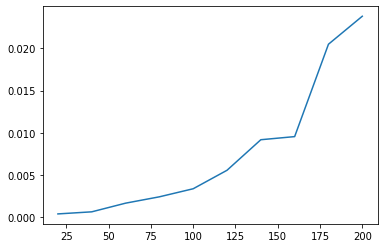

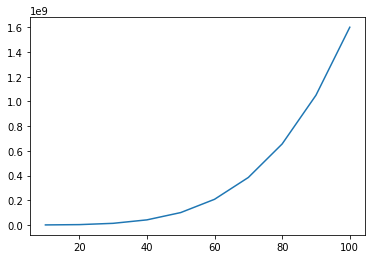

In [10]:
doubled_elapsed_times = []

for vertice_amount in vertice_amounts:
    doubled_vertice_amount = vertice_amount * 2
    overall_time = 0
    for _ in range(iterations):
        matrix = generate_adjacency_matrix(doubled_vertice_amount, doubled_vertice_amount * (doubled_vertice_amount - 1), 100)
        
        start_time = time.time()
        matrix = sssp_levit(matrix, 0)
        overall_time += time.time() - start_time
    average_time = overall_time / iterations
    print(doubled_vertice_amount * (doubled_vertice_amount - 1), average_time)
    doubled_elapsed_times.append(average_time)

fig_experiment, ax_experiment = plt.subplots()
fig_control, ax_control = plt.subplots()

for i in range(len(vertice_amounts)):
    print(elapsed_times[i], doubled_elapsed_times[i], doubled_elapsed_times[i]/elapsed_times[i])

ax_experiment.plot([vertice_amount * 2 for vertice_amount in vertice_amounts], elapsed_times)
ax_control.plot(vertice_amounts, [(2*vertice_amount)**4 for vertice_amount in vertice_amounts])